In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [16]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california_housing = fetch_california_housing()

data = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
data['PRICE'] = california_housing.target

df = data.head(4000)




In [17]:
X= df.drop('PRICE' , axis=1) 

y= df['PRICE']

In [18]:
from sklearn.model_selection import train_test_split , GridSearchCV 

from sklearn.metrics import mean_squared_error,r2_score

from sklearn.linear_model import Lasso

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing  import StandardScaler  
scaler = StandardScaler() 

X_train= scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [21]:
lasso=Lasso()

In [22]:
# Define the hyperparameter grid
parameters = {'alpha': [0.1, 1.0, 10.0, 40.0, 30.0, 50.0, 80.0, 70.0, 90.0]}

# Perform grid search with cross-validation
grid_cv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=10)
grid_cv.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_cv.best_params_['alpha']

# Print the best hyperparameter
print(f'Best alpha: {best_alpha}')

Best alpha: 0.1


In [23]:
# Use the best model to make predictions on the test set
best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = best_model.score(X_test, y_test)

print(f'Mean Squared Error on test set: {mse:.2f}')
print(f'R-squared on test set: {r2:.2f}')

Mean Squared Error on test set: 0.36
R-squared on test set: 0.63


c:\Users\Jayraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


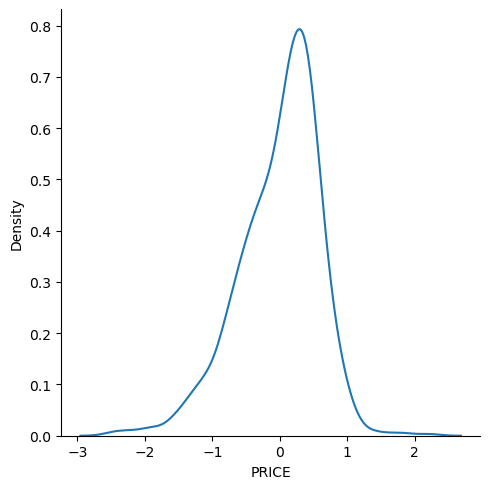

In [24]:
import seaborn as sns  

sns.displot(y_pred-y_test  , kind='kde')